piramide

In [4]:
import pandas as pd

# 1. Cargar el archivo original (ajusta el nombre si es necesario)
df = pd.read_csv("data/viajeros_pernoctaciones_estancia.csv")

# 2. Seleccionar solo las columnas relevantes
df_filtered = df[['provincia', 'estancia_media_esp', 'estancia_media_ext']]

# 3. Agrupar por provincia y calcular la media (puedes cambiar 'mean' por 'sum' o 'median' si prefieres)
df_grouped = df_filtered.groupby('provincia', as_index=False).mean()

# 4. Guardar el resultado en un nuevo archivo CSV
df_grouped.to_csv('piramide.csv', index=False)

print("✅ Archivo 'estancia_media_por_provincia.csv' creado correctamente.")

✅ Archivo 'estancia_media_por_provincia.csv' creado correctamente.


heatmaps

In [5]:
import pandas as pd

df_test = pd.read_csv("data/viajeros_pernoctaciones_estancia.csv")

# Paso 2: Crear un nuevo DataFrame con las columnas deseadas
df_subset = df_test[['periodo', 'provincia', 'estancia_media_total']]

# Paso 3: Mostrar las primeras filas
print(df_subset.head())


   periodo          provincia  estancia_media_total
0  2024M12          29 Málaga              3.061172
1  2024M12         41 Sevilla              2.003752
2  2024M12  07 Balears, Illes              3.037766
3  2024M12       08 Barcelona              2.289031
4  2024M12          17 Girona              1.659964


In [6]:
# Paso 4: Filtrar solo los registros del año 2024
df_2024 = df_subset[df_subset['periodo'].astype(str).str.startswith('2024')]

# Mostrar las primeras filas filtradas
df_2024


,periodo,provincia,estancia_media_total
0,2024M12,29 Málaga,3.061172
1,2024M12,41 Sevilla,2.003752
2,2024M12,"07 Balears, Illes",3.037766
3,2024M12,08 Barcelona,2.289031
4,2024M12,17 Girona,1.659964
...,...,...,...
79,2024M01,"07 Balears, Illes",3.275065
80,2024M01,08 Barcelona,2.385141
81,2024M01,17 Girona,1.694055
82,2024M01,46 Valencia/València,2.019708


In [7]:
# Paso 5 (versión limpia): crear una columna 'mes' solo con el nombre del mes
meses = {
    'M01': 'enero',
    'M02': 'febrero',
    'M03': 'marzo',
    'M04': 'abril',
    'M05': 'mayo',
    'M06': 'junio',
    'M07': 'julio',
    'M08': 'agosto',
    'M09': 'septiembre',
    'M10': 'octubre',
    'M11': 'noviembre',
    'M12': 'diciembre'
}

# Extraer el código de mes y mapearlo a nombre
df_2024 = df_2024.copy()  # evita el warning
df_2024['mes'] = df_2024['periodo'].str.extract(r'(M\d{2})')[0].map(meses)

# Mostrar resultado
df_2024


,periodo,provincia,estancia_media_total,mes
0,2024M12,29 Málaga,3.061172,diciembre
1,2024M12,41 Sevilla,2.003752,diciembre
2,2024M12,"07 Balears, Illes",3.037766,diciembre
3,2024M12,08 Barcelona,2.289031,diciembre
4,2024M12,17 Girona,1.659964,diciembre
...,...,...,...,...
79,2024M01,"07 Balears, Illes",3.275065,enero
80,2024M01,08 Barcelona,2.385141,enero
81,2024M01,17 Girona,1.694055,enero
82,2024M01,46 Valencia/València,2.019708,enero


In [8]:
# Paso 5 (versión limpia): crear una columna 'mes' solo con el nombre del mes
meses = {
    'M01': 'Gen',
    'M02': 'Feb',
    'M03': 'Mar',
    'M04': 'Abr',
    'M05': 'May',
    'M06': 'Jun',
    'M07': 'Jul',
    'M08': 'Ago',
    'M09': 'Sep',
    'M10': 'Oct',
    'M11': 'Nov',
    'M12': 'Dic'
}

# Extraer el código de mes y mapearlo a nombre
df_2024 = df_2024.copy()  # evita el warning
df_2024['mes'] = df_2024['periodo'].str.extract(r'(M\d{2})')[0].map(meses)

# Mostrar resultado
df_2024[['mes', 'provincia', 'estancia_media_total']].head()


,mes,provincia,estancia_media_total
0,Dic,29 Málaga,3.061172
1,Dic,41 Sevilla,2.003752
2,Dic,"07 Balears, Illes",3.037766
3,Dic,08 Barcelona,2.289031
4,Dic,17 Girona,1.659964


C:\Users\buona\AppData\Local\Temp\ipykernel_2248\1662219688.py:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df_2024.pivot_table(


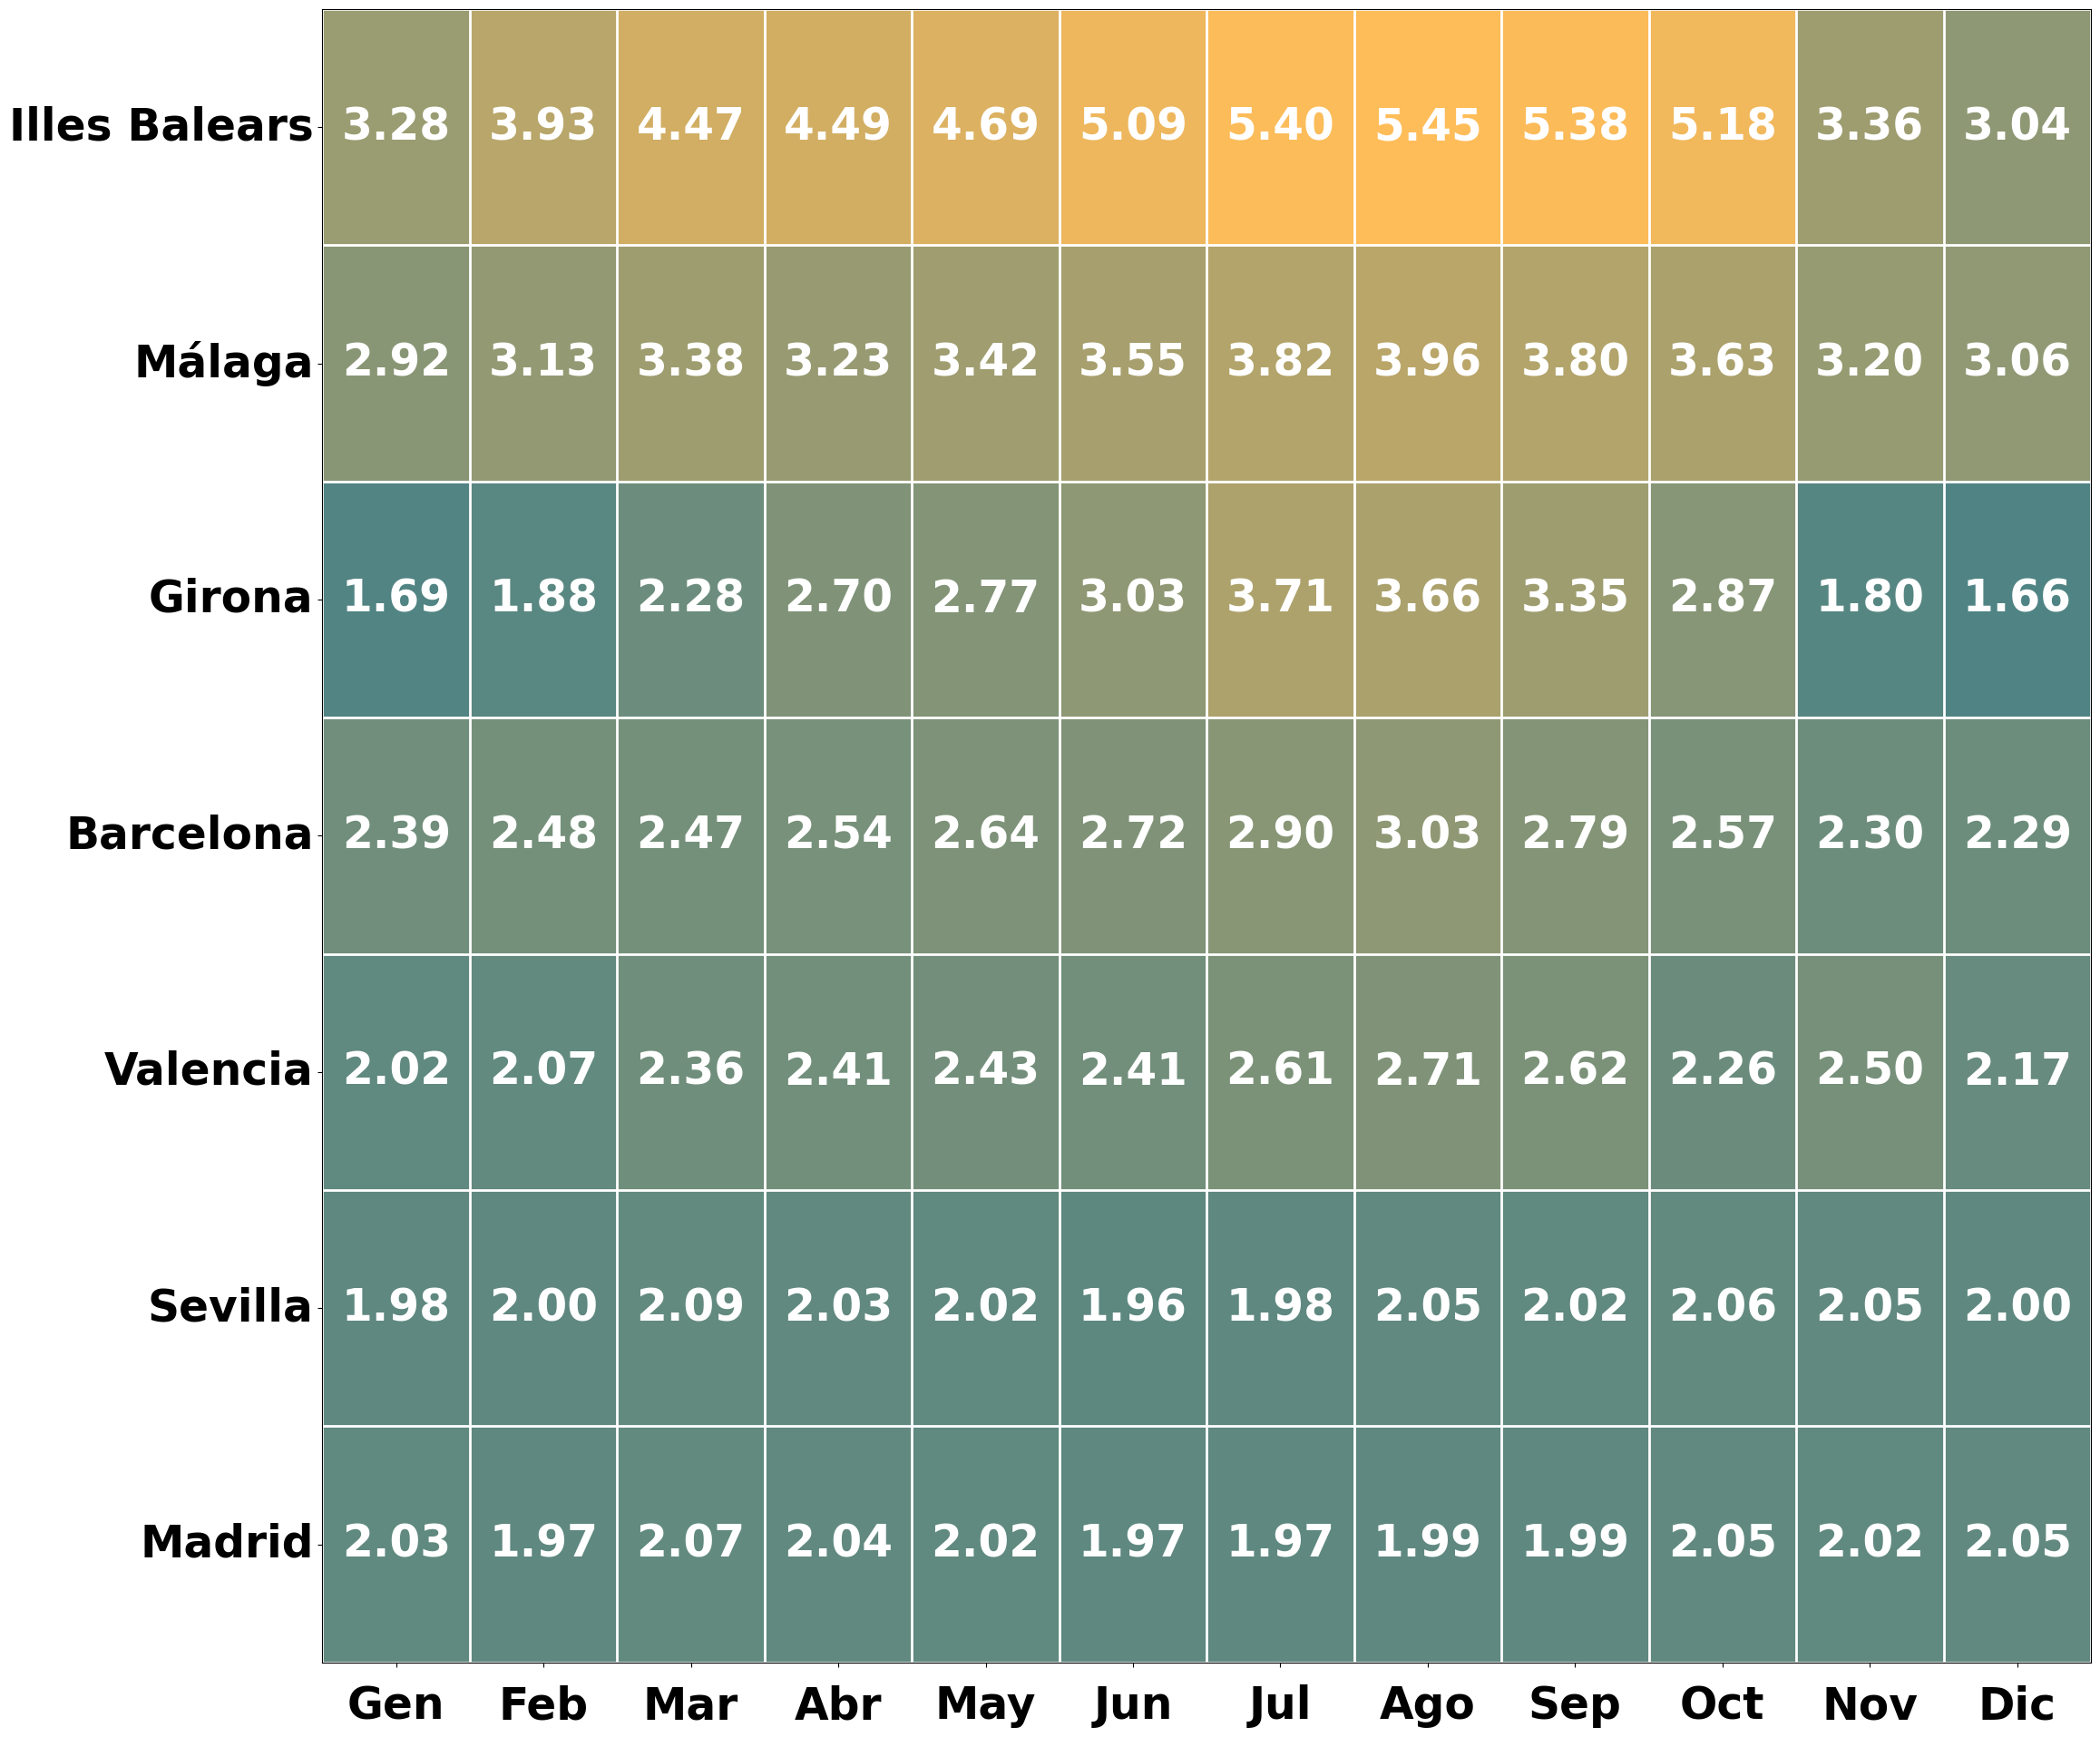

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



# 1) Orden cronológico de meses
orden_meses = [
    'Gen','Feb','Mar','Abr','May','Jun',
    'Jul','Ago','Sep','Oct','Nov','Dic'
]

df_2024 = df_2024.copy()
df_2024['provincia'] = df_2024['provincia'].str.replace(r'^\d+\s+', '', regex=True)


df_2024['mes'] = pd.Categorical(
    df_2024['mes'],
    categories=orden_meses,
    ordered=True  # 👈 aquí estaba el error: debe ir completo en una sola línea
)



# 2) Tabla provincias x meses con la media de estancia
tabla = df_2024.pivot_table(
    index='provincia',
    columns='mes',
    values='estancia_media_total',
    aggfunc='mean'
)

# 3) Ordenar provincias por media anual
tabla = tabla.reindex(tabla.mean(axis=1).sort_values(ascending=False).index)
tabla = tabla.reindex(columns=orden_meses)


# 4) Crear paleta personalizada y heatmap
colores = ['#508484', '#FFBD59']  # de Extranjeros (frío) a Residentes (cálido)
cmap_personal = LinearSegmentedColormap.from_list('custom_map', colores, N=256)

# 🔹 Renombrar provincias en el eje Y
tabla.rename(index={
    'Balears, Illes': 'Illes Balears',
    'Valencia/València': 'Valencia'
}, inplace=True)



fig, ax = plt.subplots(figsize=(24, 20))

# 🔹 Aumentar tamaño y grosor de todo el texto
plt.rcParams.update({
    'font.size': 35,        # tamaño base de fuente
    'axes.labelsize': 35,   # etiquetas de ejes
    'axes.titlesize': 35,   # título (si lo agregas)
    'xtick.labelsize': 35,  # etiquetas del eje X
    'ytick.labelsize': 35,  # etiquetas del eje Y
    'font.weight': 'bold',  # grosor de toda la fuente
})

# 🔹 Crear el heatmap
im = ax.imshow(tabla.values, aspect='auto', cmap=cmap_personal)

# 🔹 Añadir líneas divisorias entre las celdas
ax.set_xticks(np.arange(-0.5, len(tabla.columns), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(tabla.index), 1), minor=True)
ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
ax.tick_params(which='minor', bottom=False, left=False)


# 🔹 Ejes y etiquetas
ax.set_xticks(range(len(tabla.columns)))
ax.set_xticklabels(tabla.columns, rotation=0, ha='right')
ax.set_yticks(range(len(tabla.index)))
ax.set_yticklabels(tabla.index)

# --- Alinear perfectamente la rejilla con los ejes y centrar etiquetas ---
nrows, ncols = tabla.shape

# Límites exactamente en los bordes de las celdas
ax.set_xlim(-0.5, ncols - 0.5)
ax.set_ylim(nrows - 0.5, -0.5)   # ojo: y va invertido en imshow

# Ticks en el centro de cada celda
ax.set_xticks(np.arange(ncols))
ax.set_yticks(np.arange(nrows))

# Etiquetas centradas
ax.set_xticklabels(tabla.columns, ha='center')
ax.set_yticklabels(tabla.index, va='center')

# Un poco de separación vertical para que no “toquen” la rejilla
ax.tick_params(axis='x', pad=14)

# Si usaste aspect='equ
# al' y te descoloca, vuelve a 'auto'
# im.set_aspect('auto')



# 🔹 Añadir los valores encima de los colores
for i in range(len(tabla.index)):
    for j in range(len(tabla.columns)):
        valor = tabla.iloc[i, j]
        if not np.isnan(valor):
            ax.text(j, i, f"{valor:.2f}", ha='center', va='center',
                    color='white', fontsize=35, fontweight='bold')

plt.tight_layout()
plt.show()






